### ISSUES

- Modify Relative.analyse() to allow some portion of trajectory to be discarded as equilibration?
- Without alchemlyb, analysis uses MBAR even if TI specified.
- Analysis for ABFE returns 95 % CI, not standard error (as in docstring)

# <span style="color:teal"> Absolute Binding Free Energies and Experimental Features in BioSimSpace: Analysis</span>
This is the second of two jupyter notebooks on Absolute Binding Free Energy (ABFE) calculations in BioSimSpace for the September 2022 CCPBioSim Workshop. This notebook describes the analysis of ABFE calculations. The first notebook, "setup_abfe.ipynb" discussed the integration of experimental features into BioSimSpace through the *sandpit*, and the setup of absolute binding free energy calculations using BioSimSpace.

This notebook includes core as well as <span style="color:purple">extra</span> options.

##### <span style="color:teal">Required Knowledge</span> 
 - Basic python
 - Part 1 of this workshop (Introduction to Alchemistry with BioSimSpace)
    - This provides a basic overview of the use of BioSimSpace
 - The first notebook in Part 3 of this workshop,: "setup_abfe.ipynb"
    - This discusses the setup of ABFE calculations in BioSimSpace

##### <span style="color:teal">Learning objectives</span>  
 - Understand the functionality supplied by BioSimSpace for the analysis of ABFE calculations
 - Understand some general principles applying to the analysis of ABFE calculations

##### <span style="color:teal">Reading Time</span>  
~ 30 mins

##### <span style="color:teal">Jupyter Cheat Sheet</span>  
- To run the currently highlighted cell and move focus to the next cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To run the currently highlighted cell and keep focus in the same cell, hold <kbd>&#x21E7; Ctri</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;
- You can find the full documentation at [biosimspace.org](https://biosimspace.org).

##### <span style="color:teal">Table of Contents</span>  

TOBEFIXED

1. [Basic Analysis in BioSimSpace](#basic_ana)    
   1.1 [Overlap Matrices](#overlap)
   1.2 [Potentials of Mean Force](#pmf)
   
2. [Further Analysis](#further_analysis)   
    2.1 [Are My Results Reproducible?](#repro)     
    2.2 [Is My Equilibration Period Sufficient and are my Results Converged?](#conv)    
    2.3 [Are there Alternative Binding Poses?](#poses)    
    2.4 [Do I Need Symmetry Corrections?](#sym)    

 <span style="color:pink">Further reading </span> references some sections of the [LiveComs Best Practices for Alchemical Free Energy Calculations](https://livecomsjournal.org/index.php/livecoms/article/view/v2i1e18378).

##### <span style="color:teal">Authors</span>  
 - Finlay Clark (@fjclark)


In [81]:
# Import Exscientia sandpit as before
import BioSimSpace.Sandpit.Exscientia as BSS

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color:teal"> 1. Basic Analysis in BioSimSpace</span>
<a id="basic_ana"></a>

Running a full set of ABFE calculations for the MIF / MIF-180 complex takes days, so we've provided example output for simulations with SOMD in `example_output`. This includes all required input files and output energies, although we've removed the large trajectory files. The Boresch restraints were based on the triazole ring (anchor points shown as spheres):

<img src="images/boresch_restr_2.png" width="400"/>


#### <span style="color:teal"> 1.1 Overlap Matrices </span>
<a id="overlap"></a>

As discussed in the relative binding free energy workshop, you can analyse your data to obtain the potential of mean force along lambda and overlap matrix through BioSimSpace. Normally, this would be done using the `Absolute` object directly. For example, having run `restrain_fe_calc`:

```Python
restrain_fe_calc.analyse()
```

However, `analyse` can also be used directly through the Absolute class, allowing us to analyse our pre-computed data:

In [41]:
pmf, overlap = BSS.FreeEnergy.Absolute.analyse("example_output/bound/run001/restrain/output", estimator="MBAR")

##### <span style="color:teal"> Exercise: Inspect the Overlap Matrices </span>

As discussed in the previous notebook, sufficient overlap is required for the MBAR estimator to be reliable. Plot the overlap matrices for run001, for all stages for the bound and free legs. Have a sufficient number of $\mathrm{\lambda}$ values been used for all simulations? Can you suggest improvements to the spacing or number of $\mathrm{\lambda}$ windows for any stage?

In [46]:
def plot_overlap(data):
    overlap_mat = sns.heatmap(data ,square=True, linewidths=.5,
                            cbar_kws={"label": "Overlap"})
    overlap_mat.set_xlabel("$\mathrm{\lambda}$ Index")
    overlap_mat.set_ylabel("$\mathrm{\lambda}$ Index")

In [48]:
# FIXME: Obtain the overlap data and plot the overlap matrices for all stages using plot_overlap

#### <span style="color:teal"> 1.2 Potentials of Mean Force </span>
<a id="pmfs"></a>

`BSS.FreeEnergy.Absolute.Analyse()` also returns the potential of mean force (PMF) with respect to $\mathrm{\lambda}$, which shows how the free energy changes as an interaction (restraints, charges, or Lennard-Jones) is scaled with $\mathrm{\lambda}$:

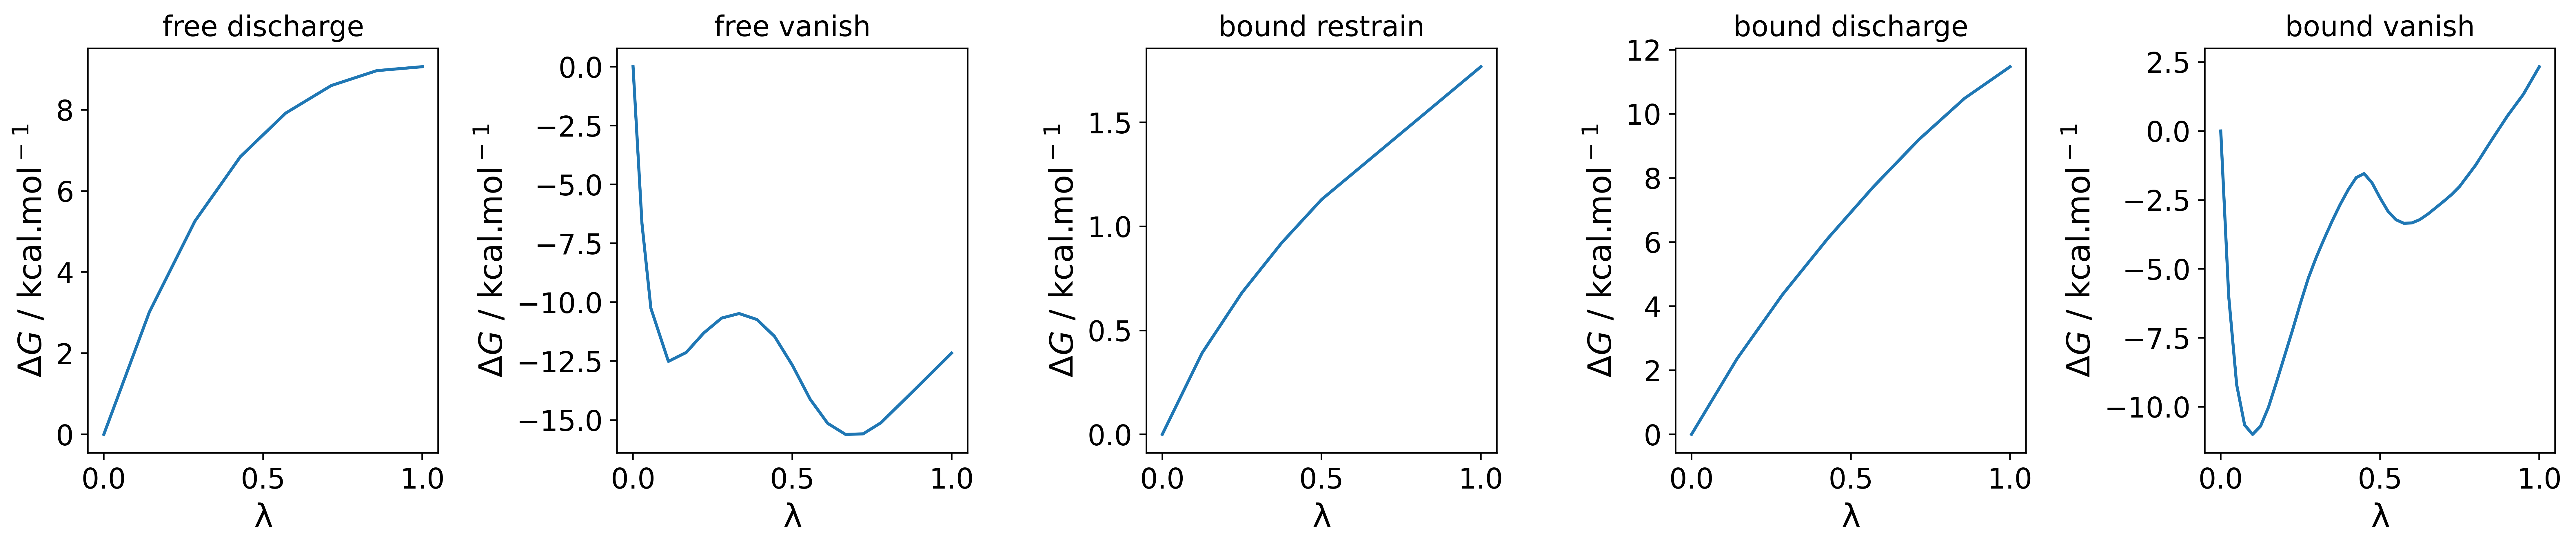

In [93]:
# Plot the PMFs for all stages for both legs

legs = {"free":["discharge", "vanish"], "bound":["restrain", "discharge", "vanish"]}

fig, axs = plt.subplots(1, 5, figsize=(18,4), dpi=500)

for i, leg in enumerate(legs):
    for j, stage in enumerate(legs[leg]):
        pmf, _ = BSS.FreeEnergy.Absolute.analyse(f"example_output/{leg}/run001/{stage}/output", estimator="MBAR")
        lam_vals = [x[0] for x in pmf]
        delta_g = [x[1].value() for x in pmf] # Need .value() to remove energy units
        ax = axs[i*2+j]
        ax.plot(lam_vals, delta_g)
        ax.set_ylabel("$\Delta \it{G}$ / kcal.mol$^-$$^1$")
        ax.set_xlabel("$\mathrm{\lambda}$")
        ax.set_title(f"{leg} {stage}")

fig.tight_layout()

##### <span style="color:teal"> Exercise: Find the Free Energy of Binding </span>

Estimate $\Delta\textit{G}_{\textrm{Bind}}^o$ for run 1 by adding up all the terms around the free energy cycle:

<img src="images/abfe_cycle_details.png" width="400"/>

Hints: 
- Remember to change the signs to match the cycle
- Remember to include the correction term for releasing the restraint
- Remember to include an estimate of uncertainty (check `BSS.FreeEnergy.Absolute.analyse?`)
- When extracting the free energies from the PMF, remember to use .value() to remove the unit

First, obtain the free energies from the simulations:

In [ ]:
# Initialise dicts to store free energies and uncertainties
free_energies = {"free":{"discharge":0, "vanish":0}, "bound":{"restrain":0, "discharge":0, "vanish":0}}
uncertainties = {"free":{"discharge":0, "vanish":0}, "bound":{"restrain":0, "discharge":0, "vanish":0}}

for leg in free_energies:
    for stage in free_energies[leg]:
        # FIXME: Using BSS.FreeEnergy.Absolute.analyse, find the free energy changes corresponding to each 
        # stage in the ABFE cycle shown. Remember to include the associated uncertainties.

Now, obtain the correction term from the restraint:

In [115]:
# Import required units
from BioSimSpace.Sandpit.Exscientia.Units.Length import angstrom
from BioSimSpace.Sandpit.Exscientia.Units.Angle import radian, degree
from BioSimSpace.Sandpit.Exscientia.Units.Energy import kcal_per_mol
from BioSimSpace.Sandpit.Exscientia.Units.Temperature import kelvin

# The restraint object requires a system
system = BSS.IO.readMolecules(["input/complex/mif_mif180.prm7", "input/complex/mif_mif180.rst7"])
lig = BSS.Align.decouple(system[0])
system.updateMolecule(0,lig)

# Assign three atoms from the protein
r1 = system.getAtom(935)
r2 = system.getAtom(933)
r3 = system.getAtom(937)

# Assign three atoms from the ligand
l1 = system.getAtom(10)
l2 = system.getAtom(13)
l3 = system.getAtom(20)

restraint_dict = {
        "anchor_points":{"r1":r1, "r2":r2, "r3":r3,
                         "l1":l1, "l2":l2, "l3":l3},
        "equilibrium_values":{"r0": 8.14 * angstrom,
                              "thetaA0": 2.06 * radian,
                              "thetaB0": 1.89 * radian,
                              "phiA0": 1.68 * radian,
                              "phiB0": 1.52 * radian,
                              "phiC0": 0.20 * radian},
        "force_constants":{"kr": 10.92 * kcal_per_mol / angstrom ** 2,
                           "kthetaA": 126.83 * kcal_per_mol / (radian * radian),
                           "kthetaB": 98.43 * kcal_per_mol / (radian * radian),
                           "kphiA": 189.35 * kcal_per_mol / (radian * radian),
                           "kphiB": 58.81 * kcal_per_mol / (radian * radian),
                           "kphiC": 100.72 * kcal_per_mol / (radian * radian)}}

In [120]:
# FIXME: Using the system and restraint dictionary created above, 
# create a BSS.FreeEnergy.Restraint object and obtain the correction term

In [ ]:
# FIXME: Calculate the free energy of binding for run 1.

The experimental binding free energy of MIF-180 to MIF is [-8.98 $\pm$ 0.28 kcal mol $^{-1}$](https://pubs.acs.org/doi/pdf/10.1021/acs.jpcb.9b07588). Compare your answer. Consider:

- Can we have confidence in our binding free energy estimate? 
    - If yes, on what basis?
    - If no, what additional checks would you suggest? Have any key considerations been omitted?
- Do you think your uncertainty estimate is sufficient? 
- In the limit of perfect sampling, would you expect the free energy estimate to be exactly the same as the experimental value?

### <span style="color:teal"> 2. Further Analysis</span>
<a id="further_analysis"></a>

We should regard our free energy estimate above, no matter how similar to experiment, as an extremely rough estimate which serves only as a sanity check on our calculations. To have confidence in our result, we must first perform a number of key checks.

#### <span style="color:teal"> 2.1 Are My Results Reproducible? </span>
<a id="repro"></a>

A minimal test of reproducibility is performing replicate runs where all atoms are assigned different initial velocities. This was done to produce the data provided for runs 1 - 5 in `example_output`.

##### <span style="color:teal"> Exercise: Deviation Between Replicate Runs </span>

Analyse the data for the 5 replicate runs for the vanish stage of the bound leg to provide a revised estimate of the free energy change for this stage. Calculate a new measure of the uncertainty for this stage, and compare it to the uncertainty estimate obtained for a single run. 

In [121]:
# FIXME: Find the free energy change for "vanishing" the bound ligand based on the
# 5 repeat runs. Provide a revised uncertainty estimate for this stage.

Hopefully it is clear that performing several replicate runs is essential for obtaining a meaningful uncertainty estimate, and therefore a meaningful result.

#### <span style="color:teal"> 2.2 Is My Equilibration Period Sufficient and are my Results Converged? </span>
<a id="conv"></a>

If our free energy estimate is correct, then it should not change with increasing simulation time. This can be checked by repeatedly truncating the data at a given simulation time and analysing the free energy change with the remaining data. The results are plotted for the bound stages, where the blue line shows the average over all runs and the beige fill indicates the 95 % t-based confidence intervals:

<img src="images/convergence_no_equil.png" width="1000"/>

There seems to be some drift with increasing simulation time for the vanish stage especially. In addition, all runs for all stages evolve in the same direction with increasing simulation time at early values of total simulation time. This is because we have completely failed to include any equilibration time for each $\mathrm{\lambda}$ window! As a result, the systems do not have enough time to relax from starting configurations which would otherwise have a very low probability of being sampled. To avoid this biasing our simulations, we should discard an initial portion of each trajectory as equilibration (or perform short equilibration simulations for each $\mathrm{\lambda}$ window).

The analysis was repeated after discarding the initial 1 ns (of 6 ns) for the restrain and discharge stages, and the initial 3 ns (of 8 ns) for the vanish stage. Greater equilibration time was required for the vanish stage in order to allow water to enter the binding site once the ligand became "soft" enough.

<img src="images/convergence_equil.png" width="1000"/>

This removes the initial correlation between the time evolution of the repeat runs, and results in average estimates (blue line) for the vanish and discharge stages which show no clear drift with time, suggesting that we have achieved convergence. There appears to be some drift for the restrain stage, although the gradient is very shallow. With equilibration, we found $\Delta\textit{G}_{\textrm{Bind}}^o=-5.95 \pm 1.05$ kcal mol $^{-1}$ (95 % t-based confidence interval).

While reassuring, it should be noted that a lack of drift of the free energy estimate with respect to increasing simulation time does not guarantee converged sampling - it may be that transitions to other important configurations are not sampled on the timescale of the simulations.

#### <span style="color:teal"> 2.3 Are there Alternative Binding Poses? </span>
<a id="poses"></a>

We have selected restraints based on a short unrestrained simulation of the fully interacting complex. These restraints closely confine the ligand to the binding pose sampled, and therefore our ABFE calculations make the implicit assumption that this is the single dominant binding pose. If there are other binding poses with similar or more favourable free energies of binding, our estimate based on a single binding pose will be wrong. 

In fact, we found another binding pose for MIF-180. The two poses are shown below:

<img src="images/alt_poses.png" width="1000"/>

While they appear similar, we found that interconversion occurred very infrequently on the timescale of the simulations. The bound leg calculations were repeated for the alternative binding pose, yielding a binding free energy of $\Delta\textit{G}_{\textrm{Bind}}^o=-5.98 \pm 1.11$ kcal mol $^{-1}$ (95 % t-based confidence interval).

Where there are alternative binding poses, [the free energies should be combined according to](https://aip.scitation.org/doi/full/10.1063/1.2221683):

\begin{align*}
\Delta G_{\text {Bind}}^{o}=-k_{B}T\ln[\exp(-\beta\Delta\textit{G}_{\textrm{Bind, 1}}^o) + \exp(-\beta\Delta\textit{G}_{\textrm{Bind, 2}}^o)]
\end{align*}

Where the subscripts 1 and 2 indicate alternative binding poses. 

##### <span style="color:teal"> Exercise: Deviation Between Replicate Runs </span>

Calculate the overall binding free energy by combining the estimates from the two different poses. Propagate the error.

In [1]:
# FIXME: Calculate the overall free energy of binding based on both binding poses

#### <span style="color:teal"> 2.4 Do I Need Symmetry Corrections? </span>
<a id="sym"></a>

When the receptor-ligand restraints are imposed, sometimes a symmetry correction is required. However, symmetry corrections can be confusing and they are a common source of errors in the literature. [This article](https://aip.scitation.org/doi/full/10.1063/5.0046853) is recommended.

Symmetry corrections are required when there is some symmetry in the energy of they system which is broken by the introduction of restraints, but only when the symmetric energy minima are not sampled at all as the restraints are introduced. If there is sampling of all symmetry-related regions of configurations space as the restraints are introduced then a correction is not required, and if there is partial sampling then this represents a sampling issue. For example, imagine we have a ligand with two symmetry-related binding modes. If restraints are introduced which completely prevent sampling of one of the poses, and this pose is not sampled at all as the restraints are turned on, then a symmetry correction of $-k_BT\ln2$ is required. This recovers the free energy change which would have been observed during the restraining simulations had the other binding pose been sampled.

##### <span style="color:teal"> Exercise: The Final Result </span> 

Look at the structure of MIF, a homotrimer:

<img src="images/mif_mif180.png" width="400"/>

Is a symmetry correction required for the restraints used for these simulations? Based on this, calculate your final estimate of $\Delta\textit{G}_{\textrm{Bind}}^o$, making sure to account for the alternative binding poses and any necessary symmetry corrections. Compare with experiment and your rough initial estimate.

##### <span style="color:teal"> Exercise: Other Symmetry Corrections </span> <span style="color:purple">(Extra)</span>

Can you think of another case for this system where symmetry corrections might be required?

#### <span style="color:teal">Feedback</span>

We hope you've enjoyed your introduction to BioSimSpace! Please let us know if you have any feedback on the sessions or the implementation of BioSimSpace.